#Visualização e Classificação dos Dados da Iris em Python com Pacotes de Data Science
---
- Está codificação visa apresentar a classificação do dataset iris.
- São utilizado na classificação os pacotes: numpy, matplotlib, sklearn
- O algoritmo utilizado é SVM: Support-Vector Machines

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn import svm
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

### Load na base de dados

In [0]:
#Carregamento do dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/wellingtondantas/Data-Science/master/Datasets/iris.csv")

In [731]:
#Apresenta o dataset
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


###Buscando informações iniciais do dataset

In [733]:
#Verificando a matriz dos dados
print(dataset.shape)

#Mostra se existem valores nulos
print('\n', dataset.isnull().values.any())

#Apresenta as primeiras linhas do dataset
print('\n', dataset.head(5))

#Apresenta as últimas linhas do dataset
print('\n', dataset.tail(5))

#Transformando em matriz para verificação de propriedades
base = np.array(dataset.values)
print('\n', base[0:5])

#Apresentação da quantidade de padrões
print('\n', len(base))

#Verifica a quantidade de classes diferentes
numClasses = np.unique(base[:,-1]).size
print('\n', numClasses)

#Mostrando quais as classes existentes
classes = np.unique(base[:,-1])
print('\n', classes)

#apresenta o balanceamento dos padrões
print('\n Número de Padrões por Classes')
for item in classes:
  print(' {0} : {1} : ({2:2.2f}%)'.format(item, sum(base[:,-1] == item), (sum(base[:,-1] == item)/len(base))*100 ))

(150, 5)

 False

    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

      sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

 [[5.1 3.5 1.4 0.2 'setosa']
 [4.9 3.0 1.4 0.2 'setosa']
 [4.7 3.2 1.3 0.2 'setosa']
 [4.6 3.1 1.5 0.2 'setosa']
 [5.0 3.6 1.4 0.2 'setosa']]

 150

 3

 ['setosa' 'versicolor' 'vi

###Buscando correlações e algumas visualizações iniciais

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


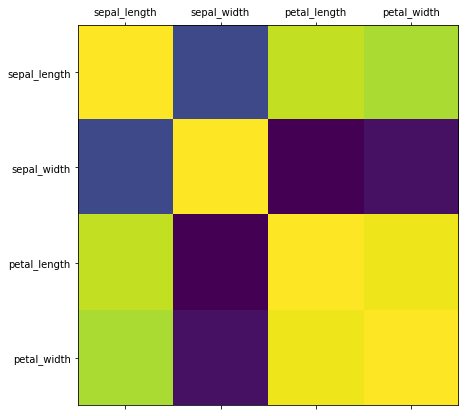

In [734]:
#Identificando a correlação entre as variáveis com os nomes das colunas
def plot_corr(dataset, size=7):
    corr = dataset.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)

#Criando o gráfico
plot_corr(dataset)

#Visualizando a correlação em tabela numericamente
dataset.corr()

###Manipulação do Dataset
- No dataset da Iris existem 3 classes como analisado na seção anterior: setosa; versicolor e virgínica. Os algoritmos de Machine Learning não entendem strings (textos) como saída dos output, esses nomes de classes precisam ser transformado para valores numéricos.

- Você pode precisar escolher quais os melhores atributos.

- É necessário fazer a normalização dos atribulos [0 - 1].

- É preciso dividir o dataset em conjuntos de atribulos [X] e rotulos [Y]

In [735]:
################### CUIDADO ! :  Executar somente uma vez #################

#Envia os dados dataset para um novo frame
d = dataset

#Forma um dicionário para transformar as classes em valores
classe = {}
for item, nome in enumerate(classes):
  classe.update({nome:item})

print('\n', classe)

#Aplicando uma transformação na coluna das classes
d['species'] = d['species'].map(classe)

#Apresentação da nova forma
d


 {'setosa': 0, 'versicolor': 1, 'virginica': 2}


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [736]:
# Seleção de atributos preditoras (Nem todos os atributos são importantes)
atributos = ['sepal_length', 'sepal_width', 'petal_length','petal_width']

# Variável a ser prevista
rotulo = ['species']

# Criando objetos
X = d[atributos].values
Y = d[rotulo].values
print('\n', X[1:5])
print('\n', Y[1:5])


 [[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

 [[0]
 [0]
 [0]
 [0]]


In [737]:
#Função de normalização da matriz de dados
normalizar = lambda m : (m-m.min())/(m.max()-m.min())

#Normalização dos dados
for i in range(5-1):
    X[0:150,i]=normalizar(X[0:150,i])

print('\n', X[1:5])

#A função (train_test_split) os dados de treinamento e teste:  
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

#Apresentação das dimensões dos conjuntos criados
print('\n', X_train.shape) 
print('\n', Y_train.shape) 
print('\n', X_test.shape) 
print('\n', Y_test.shape)

print('\n')
#Verificando o balanceamento dos padrões de treinamento
for item, string in enumerate(classes):
  print(' {0} : {1} : ({2}%)'.format(string, sum(Y_train == item), (sum(Y_train == item)/(len(Y_train)))*100))

print('\n')
#Verificando o balanceamento dos padrões de teste
for item, string in enumerate(classes):
  print(' {0} : {1} : ({2}%)'.format(string, sum(Y_test == item), (sum(Y_test == item)/(len(Y_test)))*100))



 [[0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]

 (120, 4)

 (120, 1)

 (30, 4)

 (30, 1)


 setosa : [40] : ([33.33333333]%)
 versicolor : [41] : ([34.16666667]%)
 virginica : [39] : ([32.5]%)


 setosa : [10] : ([33.33333333]%)
 versicolor : [9] : ([30.]%)
 virginica : [11] : ([36.66666667]%)


###Classificação dos dados com SVM


In [739]:
#Parâmetros
realizacoes=20

#Matriz que vai salvar medidas de cada realização
medidas = np.zeros([realizacoes,1])

#Instância o classificador svm do pacote sklearn, 
modelo = svm.SVC(gamma=.2, kernel='rbf', probability=True)

for item in range(realizacoes):

  #Mistura os elementos do conjunto de padrões
  lista=list(range(len(Y_train)))
  random.shuffle(lista)
  X_train=X_train[lista, :]
  Y_train=Y_train[lista, :]

  #O método (fit) é a função de treinamento
  modelo.fit(X_train, Y_train)

  #O método (predict) é a função de predição
  classes = modelo.predict(X_test)

  #Calcula a acurácia para uma realização
  medidas[item] = metrics.accuracy_score(classes,Y_test)

  #Apresentação de resultados para uma realização
  print("Acurácia: %3.2f ---> %d realização" % (medidas[item], item+1))

Acurácia: 0.97 ---> 1 realização
Acurácia: 0.97 ---> 2 realização
Acurácia: 0.97 ---> 3 realização
Acurácia: 0.97 ---> 4 realização
Acurácia: 0.97 ---> 5 realização
Acurácia: 0.97 ---> 6 realização
Acurácia: 0.97 ---> 7 realização
Acurácia: 0.97 ---> 8 realização
Acurácia: 0.97 ---> 9 realização
Acurácia: 0.97 ---> 10 realização
Acurácia: 0.97 ---> 11 realização
Acurácia: 0.97 ---> 12 realização
Acurácia: 0.97 ---> 13 realização
Acurácia: 0.97 ---> 14 realização
Acurácia: 0.97 ---> 15 realização
Acurácia: 0.97 ---> 16 realização
Acurácia: 0.97 ---> 17 realização
Acurácia: 0.97 ---> 18 realização
Acurácia: 0.97 ---> 19 realização
Acurácia: 0.97 ---> 20 realização


###Apresentação de Resultados

In [740]:
#Apresenta valores estatísticos
medidas = pd.DataFrame(medidas, columns=['Medidas (%)'])
medidas.describe()

,Medidas (%)
count,2.000000e+01
mean,9.666667e-01
std,2.278130e-16
min,9.666667e-01
25%,9.666667e-01
50%,9.666667e-01
75%,9.666667e-01
max,9.666667e-01


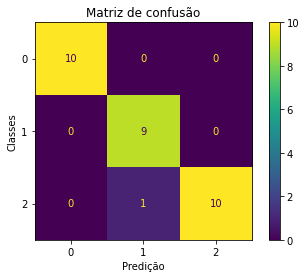

In [741]:
#A matrix de confusão apresenta aonde ocorreram os erros na predição
plot_confusion_matrix(modelo, X_test, Y_test)
plt.title('Matriz de confusão')
plt.ylabel('Classes')
plt.xlabel('Predição')
plt.show()

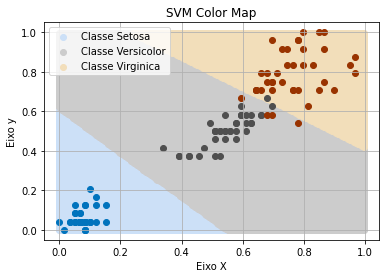

In [749]:
#Colunas selecionadas na análise
x1, x2 = 2 , 3

#Criando matrizes coletoras de pontos
color1, color2, color3, a, b, c = [], [], [], [], [], []

#Instânciando o classificador SVM do pacote sklearn
pattern = svm.SVC(kernel='rbf', gamma=0.7, probability=True)

#Treinando
modelo.fit(np.array([X_train[:,x1], X_train[:,x2]]).T, Y_train)

#Criar os pontos de cores
for i in np.arange(0,1.0,0.005):
  for j in np.arange(0,1.0,0.005):

    y = modelo.predict(np.array([[i, j]]))

    if np.array_equal(y, [0]):
        color1.append([i,j])
    elif np.array_equal(y, [1]):
        color2.append([i,j])
    elif np.array_equal(y, [2]):
        color3.append([i,j])
    else:
        raise ValueError('Nenhuma Cor\n')

for item,y in enumerate(Y_train):
    if np.array_equal(y, [0]):
        a.append(item)
    elif np.array_equal(y, [1]):
        b.append(item)
    elif np.array_equal(y, [2]):
        c.append(item)
    else:
        raise ValueError('Houve Erro!\n')

fig, ax = plt.subplots()
plt.title('SVM Color Map')
plt.xlabel('Eixo X')
plt.ylabel('Eixo y')

#Transforma lista em matrizes
color1 = np.array(color1)
color2 = np.array(color2)
color3 = np.array(color3)

ax.scatter(color1[:,0], color1[:,1], label='Classe Setosa', color=[0.80, 0.88, 0.97])
ax.scatter(color2[:,0], color2[:,1], label='Classe Versicolor', color=[0.80, 0.80, 0.80])
ax.scatter(color3[:,0], color3[:,1], label='Classe Virginica', color=[0.95, 0.87, 0.73])
ax.scatter(X_train[a,x1], X_train[a,x2], color=[0.00, 0.45, 0.74])
ax.scatter(X_train[b,x1], X_train[b,x2], color=[0.31, 0.31, 0.31])
ax.scatter(X_train[c,x1], X_train[c,x2], color=[0.60, 0.20, 0.00])
ax.legend()
ax.grid(True)
plt.show()